In [1]:
# IMPORTING IMPORTANT LIBRARIES
import numpy as np
import pandas as pd
import urllib.request
import requests
import io as i
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# LOADING DATA FROM A GIVEN URL

In [2]:
URL='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [3]:
read_url_data=requests.get(URL)

In [4]:
data_string=read_url_data.text

In [5]:
data_conv=i.StringIO(data_string)

In [6]:
data_frame=pd.read_csv(data_conv,sep=',')

In [7]:
data_frame

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# DATA PREPARATION
 In this, we have done mormalization of feature data (X) in order to bring mean close to 0 and standard deviation close to 1. Moreover, we have made one dataset of features (Hours) which is 'X' and one dataset of Target (Scores) which is 'y'.

In [8]:
#Mean is 5.012 and standard Deviation is 2.52
data_frame.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
X=data_frame.iloc[:,0]
y=data_frame.iloc[:,1]

In [10]:
#Normalized Data.
m=X.mean()
std=X.std()
X=(X-m)/std

In [11]:
#Mean is close to 2 and standard Deviation is 1 which is the desired outcome.
X.describe()

count    2.500000e+01
mean     2.042810e-16
std      1.000000e+00
min     -1.549249e+00
25%     -9.156095e-01
50%     -8.395727e-02
75%      9.457073e-01
max      1.658552e+00
Name: Hours, dtype: float64

In [12]:
#Converting dataset X and y into pandas dataframe.
X=pd.DataFrame(X)
y=pd.DataFrame(y)

# DATA VISUALISATION

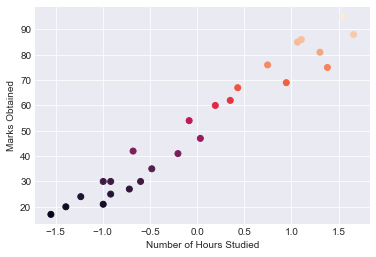

In [13]:
#Data Visualisation
sns.set_style('darkgrid')
plt.scatter(X,y,c=y)
plt.xlabel('Number of Hours Studied')
plt.ylabel('Marks Obtained')
plt.show()

Adding one cloumn of 1's in X dataframe so as to predict the values using linear regression equation which is Predicted_score = Variance * Hours + Bias.
By adding column of 1's to feature dataset, we can calculate 'Bias' which will remain fix.

In [14]:
#Adding a cloumn of ones to X dataset.
ones=np.ones((X.shape[0],1))
X_new=np.hstack((ones,X))

In [15]:
X.shape

(25, 1)

In [16]:
X_new.shape

(25, 2)

In [17]:
X_new

array([[ 1.        , -0.99481443],
       [ 1.        ,  0.03485019],
       [ 1.        , -0.71759703],
       [ 1.        ,  1.38133468],
       [ 1.        , -0.59878958],
       [ 1.        , -1.39083928],
       [ 1.        ,  1.65855208],
       [ 1.        ,  0.19326013],
       [ 1.        ,  1.30212971],
       [ 1.        , -0.91560946],
       [ 1.        ,  1.0645148 ],
       [ 1.        ,  0.35167007],
       [ 1.        , -0.20276472],
       [ 1.        , -0.67799455],
       [ 1.        , -1.54924922],
       [ 1.        ,  1.53974462],
       [ 1.        , -0.99481443],
       [ 1.        , -1.23242934],
       [ 1.        ,  0.43087504],
       [ 1.        ,  0.94570735],
       [ 1.        , -0.91560946],
       [ 1.        , -0.08395727],
       [ 1.        , -0.47998212],
       [ 1.        ,  0.74769492],
       [ 1.        ,  1.10411729]])

# CUSTOM LINEAR REGRESSION ALGORITHM IMPLEMENTATION

In [18]:
# y= variance * point + bias
def hypothesis(X,theta):
    return np.dot(X,theta)

# Mean Squared Error.
def error(X,y,theta):
    err= 0.0
    h=hypothesis(X,theta)
    m=X.shape[0]
    err = np.sum((y - h)**2)
    return err/m

def grad(X,y,theta):
    m=X.shape[0]
    h=hypothesis(X,theta)
    grad = np.dot(X.T,(h-y))
    return grad/m

def grad_desc(X,y,lr=0.1,max_epochs=100):
    n=X.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    for i in range(max_epochs):
        e=error(X,y,theta)
        error_list.append(e)
        g=grad(X,y,theta)
        theta= theta - lr*g
    return theta, error_list


    

In [19]:
#Function for predicting the values.
def prediction(X,theta):
    y_=hypothesis(X,theta)
    return y_

In [20]:
# Function to calculate the R-2 Score.
def r2_score(X,y,theta):
    y_=prediction(X,theta)
    num=np.sum((y-y_)**2)
    den=np.sum((y-y.mean())**2)
    score= (1-num/den)
    return score * 100 
    

# SPLITTING THE EXISTING DATA INTO TRAIN AND TEST DATA FOR BOTH X AND y.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_new, y, test_size=0.33, random_state=42)

In [22]:
print (X_train, y_train)


[[ 1.         -1.39083928]
 [ 1.         -0.71759703]
 [ 1.         -0.20276472]
 [ 1.          1.53974462]
 [ 1.          1.38133468]
 [ 1.         -0.59878958]
 [ 1.         -0.91560946]
 [ 1.         -1.23242934]
 [ 1.         -0.08395727]
 [ 1.          0.43087504]
 [ 1.          1.10411729]
 [ 1.          0.19326013]
 [ 1.          1.0645148 ]
 [ 1.         -1.54924922]
 [ 1.          0.94570735]
 [ 1.          1.65855208]]     Scores
5       20
2       27
12      41
15      95
3       75
4       30
20      30
17      24
21      54
18      67
24      86
7       60
10      85
14      17
19      69
6       88


In [23]:
print (X_test,y_test)

[[ 1.          1.30212971]
 [ 1.         -0.99481443]
 [ 1.         -0.99481443]
 [ 1.          0.74769492]
 [ 1.          0.35167007]
 [ 1.         -0.91560946]
 [ 1.         -0.67799455]
 [ 1.          0.03485019]
 [ 1.         -0.47998212]]     Scores
8       81
16      30
0       21
23      76
11      62
9       25
13      42
1       47
22      35


In [24]:
theta,error_list=grad_desc(X_test,y_test,lr=0.3,max_epochs=300)

# MAKING THE PREDICTIONS AND CALCULATING THE R2-SCORE.

In [25]:
# 1-Variance 2-Bias
theta

array([[51.16351695],
       [25.49168048]])

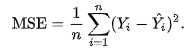

In [43]:
#Mean Squared Error is calculated where Yi is the original target value and Y^i is the predicted target value.
img

<function matplotlib.pyplot.show(*args, **kw)>

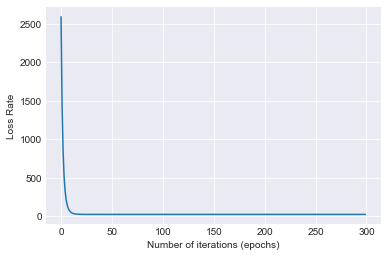

In [27]:
#Plotting Error
sns.set_style('darkgrid')
plt.plot(error_list)
plt.xlabel('Number of iterations (epochs)')
plt.ylabel('Loss Rate')
plt.show

In [28]:
y_=prediction(X_test,theta)

In [29]:
# Making one Dataframe of true values and Predicted Values.
list1=y_[:,0]
list2=y_test.iloc[:,0]

In [30]:
S={'True Values':list2,'Predicted_Values':list1}
df2=pd.DataFrame(data=S)

In [31]:
df2

,True Values,Predicted_Values
8,81,84.356992
16,30,25.804025
0,21,25.804025
23,76,70.223517
11,62,60.128178
9,25,27.823093
13,42,33.880297
1,47,52.051907
22,35,38.927966


In [32]:
# Accuracy is 94.69 percent.
r2_score(X_test,y_test,theta)

Scores    94.693485
dtype: float64

# PREDICTING THE SCORE A STUDENT WOULD OBTAINED IF HE/SHE STUDIES FOR 9.25 HOURS.

In [33]:
# Normalizing the hour data i.e 9.25
Hours=9.25
points=data_frame.iloc[:,0]
mean=points.mean()
std_=points.std()
Normalized_data=(Hours-mean)/std_

In [34]:
#Preparing the normalized data to give as input to the algorithm.
test_data=np.array([1,Normalized_data])

In [35]:
#Predicting the marks obtained by the student if he/she studies for 9.25 hours
pred=prediction(test_data,theta)
print ('Hours Studied: 9.25')
print ('No of marks would be obtained: {}'.format(pred))

Hours Studied: 9.25
No of marks would be obtained: [93.94756356]


# VISUALISING THE BEST FITTED LINE

In [36]:
theta,error_list=grad_desc(X_new,y,lr=0.1)

In [37]:
y_p=prediction(X_new,theta)

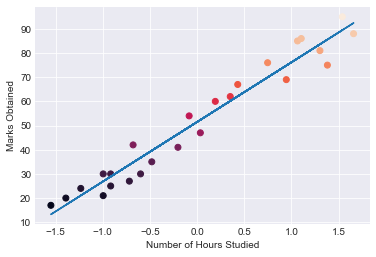

In [38]:
sns.set_style('darkgrid')
plt.scatter(X,y,c=y)
plt.plot(X_new[:,1],y_p)
plt.xlabel('Number of Hours Studied')
plt.ylabel('Marks Obtained')
plt.show()

In [39]:
from PIL import Image

In [40]:
img=Image.open('./mse.png')